# __Exploratory Data Analysis on Bicycle Accidents in Great Britain 1979-2018__

***

<font size="+3" color='#3284ad'><b>__INTRODUCTION__</b></font>

<font size="+3" color='#3284ad'><b>__About the Dataset__</b></font>`

This is a dataset of bicycle accidents in Great Britian from **1970 - 2018**. The dataset was taken from kaggle for the purpose of EDA, and can be found in the link [Here](https://www.kaggle.com/datasets/johnharshith/bicycle-accidents-in-great-britain-1979-to-2018)
This dataset includes data such as **accident index, number of vehicles involved, number of casualties, date and time of accident, speed limit, road and weather conditions, day of accident and type of road** where the accidents occurred. This includes the gender of the bikers, the severity of the accident and the age group of the victims.

The following variables might have improved this analysis:

•	Alcohol consumption

•	Vehicle Class

•	Bicycle Traffic (Number of trips per year)

•	Details of the kind and intersection where the accident happened


<font size="+3" color='#3284ad'><b>__STEP-1__</b></font>`

<font size="+2" color='#3284ad'><b>__LOAD LIBRARIES:__</b></font>`

__Pandas__ is an open source library in Python. It provides ready to use high-performance data structures and data analysis tools.
__NumPy__ is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
__Seaborn__ is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
__Matplotlib__ is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<font size="+2" color='#3284ad'><b>__LOAD DATA:__</b></font>`

#### Now, we read the data files related to accidents and bikers and merge them to get the complete dataset of bicycle accidents.

In [ ]:
df1 = pd.read_csv('Accidents.csv')
df2 = pd.read_csv('Bikers.csv')
df1.index = df1['Accident_Index']                    # indexing the dataframe
df2.index = df2['Accident_Index']                    # indexing the dataframe
df1.drop(['Accident_Index'], axis=1, inplace=True)    # dropping the index column from the dataframe b/c of duplicate index
df2.drop(['Accident_Index'], axis=1, inplace=True)     # dropping the index column    
df = pd.merge(df1, df2, on='Accident_Index')         # merging the two dataframes on the index


#### Let's see the first 5 rows of our data

In [ ]:
df.head()

,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
Accident_Index,,,,,,,,,,,,,
197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45
197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55
197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55
197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45
197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55


<font size="+3" color='#3284ad'><b>__STEP-2__</b></font>`

<font size="+2" color='#3284ad'><b>__DATA SHAPE:__</b></font>`

#### Now, check the number of rows and columns

In [ ]:
print('The number of rows are',df.shape[0])
print('The number of columns are',df.shape[1])

The number of rows are 827861
The number of columns are 13


#### It's a huge data showing 827861 rows and 13 columns.

<AxesSubplot:ylabel='None'>

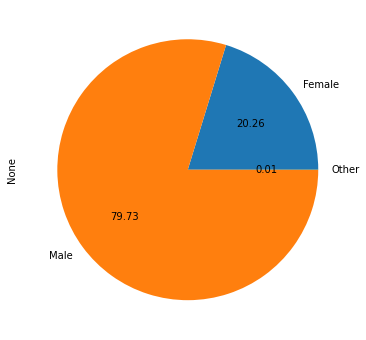

In [ ]:
# pie chart
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f', figsize=(6, 6))

The pie chart indicates that the rate of male data was considerably higher than that of female.

<font size="+3" color='#3284ad'><b>__STEP-3__</b></font>`

<font size="+2" color='#3284ad'><b>__DATA STRUCTURE:__</b></font>`

#### Here, we can see the complete information of our data having no nulll values and type of data with dtypes along with the number of rows and columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827861 entries, 197901A1SEE71 to 2018983133818
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Number_of_Vehicles    827861 non-null  int64  
 1   Number_of_Casualties  827861 non-null  int64  
 2   Date                  827861 non-null  object 
 3   Time                  827861 non-null  object 
 4   Speed_limit           827861 non-null  float64
 5   Road_conditions       827861 non-null  object 
 6   Weather_conditions    827861 non-null  object 
 7   Day                   827861 non-null  object 
 8   Road_type             827861 non-null  object 
 9   Light_conditions      827861 non-null  object 
 10  Gender                827861 non-null  object 
 11  Severity              827861 non-null  object 
 12  Age_Grp               827861 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 88.4+ MB


#### Variable Insight:
Out of 13 variables,two of them have 'int64' datatype, one have 'float64' type and the rest have the catagorical/object datatype.
#### Accident_Index:
"Accident_index" appears to be more slammed with information, but unique and complete in nature.
The first 4 characters are the year and the immediate next 2 characters by the year represents month. It is an index in our dataframe df.
#### Date:
Variable Date has an object datatype
#### Time:
Variable time is an object and we will have to change it to timestamp datatype, in order to create and execute features on different capacity.

<font size="+3" color='#3284ad'><b>__STEP-4__</b></font>`

<font size="+2" color='#3284ad'><b>__FINDING DUPLICATE VALUES AND VARIABLE ANALYSIS:__</b></font>`

In [ ]:
df.isnull().sum()

Number_of_Vehicles      0
Number_of_Casualties    0
Date                    0
Time                    0
Speed_limit             0
Road_conditions         0
Weather_conditions      0
Day                     0
Road_type               0
Light_conditions        0
Gender                  0
Severity                0
Age_Grp                 0
dtype: int64

In [ ]:
df.duplicated().sum()

4811

#### The above code shows 4811 numbers of duplicate values in the data

In [ ]:
for col in df:
    print(col, df[col].unique())  


Number_of_Vehicles [ 2  1  3  4  5  6  7  8 12  9 10 13]
Number_of_Casualties [ 1  2  3  4  7  5 10  8 13  6 60 12  9 34]
Date ['1979-01-01' '1979-02-01' '1979-04-01' ... '2018-12-31' '2018-12-26'
 '2018-03-03']
Time ['18:20' '09:15' '08:45' ... '04:17' '03:32' '03:47']
Speed_limit [ 50.  30.  40.  70.  60.  38.  25.   0.  10.  15.  20.  36.  32.  33.
  34.  46.  66.  35.  31.  55.  51.  61.  41.  39.  21.  16.  22.  27.
  26.  13.  45.  59. 660.   5.   3.  62.]
Road_conditions ['Snow' 'Wet' 'Dry' 'Frost' 'Flood' 'Missing Data']
Weather_conditions ['Unknown' 'Rain' 'Snow' 'Fog' 'Clear' 'Clear and windy' 'Other'
 'Rain and windy' 'Snow and windy' 'Missing data']
Day ['Monday' 'Tuesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Wednesday']
Road_type ['Dual carriageway' 'Unknown' 'Single carriageway' 'Roundabout'
 'One way sreet' 'Slip road']
Light_conditions ['Darkness lights lit' 'Daylight' 'Darkness no lights']
Gender ['Male' 'Female' 'Other']
Severity ['Serious' 'Slight' 'Fatal']
Age_G

#### Check for unique values in each column of the dataframe with the column name

In [ ]:
new0 = df["Speed_limit"].map({50.:60,  30.:30,  40.:30,  70.:60,  
60.:60,  38.:30,  25.:20,   0.:10,  10.:10,  15.:10,  20.:20,
36.:30,  32.:30,  33.:30,  34.:30,  46.:30,  66.:60,  35.:30,  31.:30,  55.:60,  51.:60,  61.:60,
41.:30,  39.:30,  21.:20,  16.:20,  22.:20,  27.:30,  26.:30,  13.:10,  45.:30,  59.:60, 660.:60,
5.:10,   3.:10,  62.:10})
df["Speed_limit"] = new0

df["Speed_limit"] = df["Speed_limit"].astype("category")
df.Speed_limit.dtype


CategoricalDtype(categories=[10, 20, 30, 60], ordered=False)

#### Remap Speed Limit variable and convert its type from float to category

<font size="+3" color='#3284ad'><b>__STEP-5__</b></font>`

<font size="+2" color='#3284ad'><b>__CREATING A TIME FEATURE:__</b></font>

In [ ]:
df['Time_numeric'] = df.Time.apply(lambda Time: int(Time[:2])) # extract the hour from the time column and convert to numeric
df['category'] = df.Time_numeric.apply(
    lambda Time: "Morning" if 5 <= Time <= 12 
    else "Afternoon" if 12 < Time <= 17 
    else "Evening" if 17 < Time <= 23 
    else "Night") # create a new column with the time interval 
    
df.drop(['Time_numeric'], axis=1, inplace=True) # drop the recently created hr time column


#### First we copy the dataframe to keep the original dataframe intact. Then we make a temporary variable where we save the hour value of Time as an integer. Create a new variable "category" and drop the temporary variable along with Time conversion.

In [ ]:
df.head()

,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,category
Accident_Index,,,,,,,,,,,,,,
197901A1SEE71,2,1,1979-01-01,18:20,60,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45,Evening
197901A2JDW40,1,1,1979-02-01,09:15,30,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55,Morning
197901A4IJV90,2,1,1979-04-01,08:45,30,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55,Morning
197901A4NIE33,2,1,1979-04-01,13:40,30,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45,Afternoon
197901A4SKO47,2,1,1979-04-01,18:50,30,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55,Evening


<font size="+3" color='#3284ad'><b>__STEP-6__</b></font>`

<font size="+2" color='#3284ad'><b>__SUMMARY STATISTICS AND VARIABLE ACCURACY:__</b></font>`

#### This gives us all the basic statistcal summary about the data count, mean, std, min, max and percent quantiles(25%,50%,75%) of the dataframe for each column as shown here:

In [ ]:
df.describe()

,Number_of_Vehicles,Number_of_Casualties
count,827861.000000,827861.000000
mean,1.986178,1.047212
std,0.311600,0.253509
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,1.000000
max,13.000000,60.000000


#### Observations:
1. number_of_vehicles involve in an accident: Mostly 2 vehicles with maximum and minimum (13,1) vehicles
2. number_of_casualties in accidents: On avg, casualty of 1 person is observed in each accident with max casualty number goes to 60.


<font size="+3" color='#3284ad'><b>__STEP-7__</b></font>`

<font size="+3" color='#3284ad'><b>__DATA VISUALIZATION:__</b></font>`

<font size="+2" color='#3284ad'><b>__1. Accidents Accociated with Week Day and Time:__</b></font> 

#### _Let's make pivot table of accidents with respect to Day and Category:_
A PivotTable is an interactive way to quickly summarize large amounts of data

In [ ]:
new1 = df.groupby('category').size().reset_index(name='count') # group by the Accident_Index and the time interval and count the number of rows
new2 = new1.loc[[2,0,1,3]] # select the rows with the time interval Morning, Night, Afternoon and Evening
new2

,category,count
2,Morning,297386
0,Afternoon,324628
1,Evening,196066
3,Night,9781


#### _Lets plot the data:_

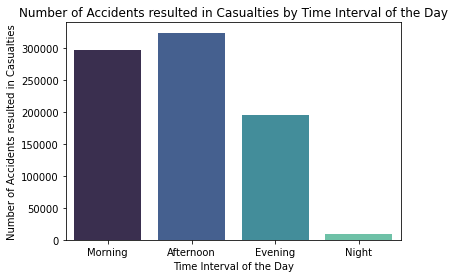

In [ ]:
fig0 = sns.barplot(x='category', y='count', data=new2, palette = "mako") # plot the bar graph
fig0.set_xlabel('Time Interval of the Day') # set the x and y labels
fig0.set_ylabel('Number of Accidents resulted in Casualties') # set the x and y labels
fig0.set_title('Number of Accidents resulted in Casualties by Time Interval of the Day') # set the title of the graph

plt.show() # show the graph

#### 
It appears that most accident happened in the afternoon, followed by morning and evening, which resulted in casualties

In [ ]:
new3 = df.groupby(["Day","category"]).size() 
new4 = new3.loc[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"],["Morning", "Afternoon","Evening","Night"],:] # select the rows with the time interval Morning, Night, Afternoon and Evening
new4 = new4.reset_index() # reset the index
new4.columns = ["Day","Time of the day","count"] # rename the columns
new4
#new4.sum(axis=0)              # sum the rows = total number of accidents counts TRUE


,Day,Time of the day,count
0,Monday,Morning,45592
1,Monday,Afternoon,49333
2,Monday,Evening,29982
3,Monday,Night,842
4,Tuesday,Morning,50605
5,Tuesday,Afternoon,51812
6,Tuesday,Evening,33225
7,Tuesday,Night,892
8,Wednesday,Morning,50990
9,Wednesday,Afternoon,51854


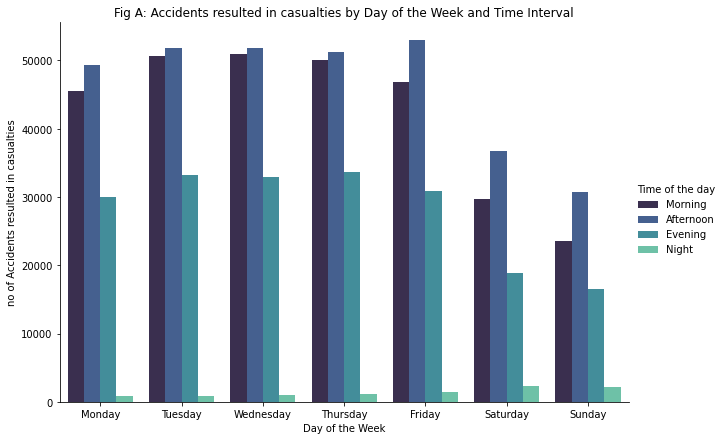

In [ ]:
# fig A
fig1 = sns.catplot(x="Day", y="count", hue="Time of the day", data=new4, kind="bar", height=6, aspect=1.5,palette = "mako") # plot the bar graph
#fig.set_axis__labels(x_var="Day of the Week", y_var="no of Accidents resulted in casualties") # set the x and y axis labels
fig1.set_xlabels("Day of the Week") # set the x axis label
fig1.set_ylabels("no of Accidents resulted in casualties") # set the y axis label
fig1.set(title="Fig A: Accidents resulted in casualties by Day of the Week and Time Interval") # set the title of the graph


plt.show() # show the graph

**The graph shows Accidents resulted in casualties by Day of the Week and Time Interval**. It appears that Accidents happen more often during work week, means Mon-Fri, and significantly lower during the weekends.\
From Mon-Thur, the difference b\w accidents during Morning hours and afternoon hours is very low. This means, the possibility of having an accident in either time of the day is almost same, however, slightly higher in afternoon. These accidents, which ultimately results in casualty, happens due to heavy traffic on the roads.\
From Fri-Sun, the gap is fairly significant b\w Morning and Afternoon, and the frequency of accident increases during night time as well.

Overall decline can be seen during Sat-Sau, which is due to the fact that Sat and Sun are holidays and people only cycle for liesure instead of travel to work. This also can be attributed to the fact that there are less no of cars on roads, which reduces the accidents frequency.\
\
Cyclist most of the time share roads with other vehicle, from motorbikes and cars to larger buses and lorries. Even if a person is an experienced cyclist, with good control and proper knowledge, one can only be safe if others usig the road follows the due regulations.\
\
Among the most common causes of cycling accidents are:\
1 - Vehicles turning into cyclist path\
2 - Drivers fail to see cyclists while turning or changing lanes.\
3 - Vehicles pulling out of a Junction.\
4 - Vehicle doors opening in front of an oncomming cyclist.\
5 - Bad roads.\
6 - Reckless Driving.

<font size="+2" color='#3284ad'><b>__2. Accidents Accociated with Road Conditions:__</b></font> 

#### _Let's make pivot table of Accidents with respect to Road Types:_


In [ ]:
new5 = df.groupby(["category","Road_conditions"]).size() # group by the Accident_Index and the time interval and count the number of rows
new5 = new5.loc[["Morning", "Afternoon","Evening","Night"],["Wet", "Frost", "Snow", "Flood", "Missing Data"],:].reset_index() # select the rows with the time interval Morning, Night, Afternoon and Evening
new5.columns = ["Time of the day","Road Conditions","count"] # rename the columns
new5
#new5.sum(axis=0)              # sum the rows = total number of accidents counts TRUE

,Time of the day,Road Conditions,count
0,Morning,Wet,74966
1,Morning,Frost,4303
2,Morning,Snow,829
3,Morning,Flood,89
4,Morning,Missing Data,636
5,Afternoon,Wet,62475
6,Afternoon,Frost,797
7,Afternoon,Snow,547
8,Afternoon,Flood,107
9,Afternoon,Missing Data,551


#### _Lets plot the data:_

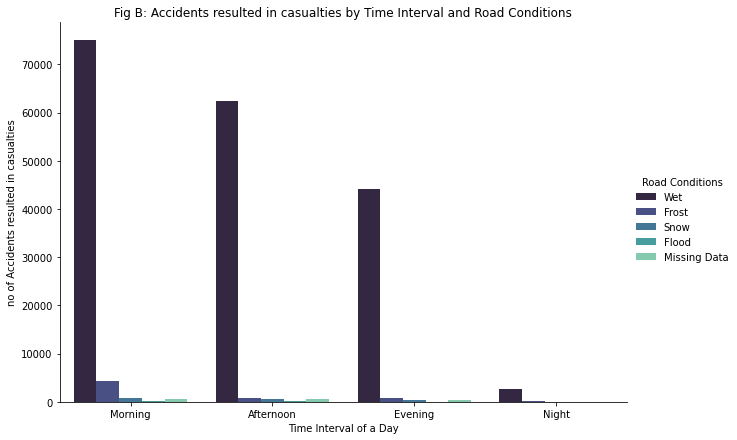

In [ ]:
# fig B
fig2 = sns.catplot(x="Time of the day", y="count", hue="Road Conditions", data=new5, kind="bar", height=6, aspect=1.5,palette = "mako") # plot the bar graph
fig2.set_xlabels("Time Interval of a Day") # set the x axis label
fig2.set_ylabels("no of Accidents resulted in casualties") # set the y axis label
fig2.set(title="Fig B: Accidents resulted in casualties by Time Interval and Road Conditions") # set the title of the graph

plt.show() # show the graph

#### 
As data suggests, mostly people prefer to go for cycling during day light and in Dry road conditions. To this end, we have immense data of casualty in Dry road conditions which overshadows the data and its significance in other Road condition categories. Therefor we dropped the Dry category of Road condition from our visualization, in order to have a clear picture about other categories of Road condition and infer the cyclist behaviour from this data.\
The frequency of accidents on "Wet" road conditions gradually decreases from morning till evening. This asserts the fact that people prefer to go for cycling during daylight. Also, the chart indicates that cyclist are sensitive towards lighting conditions and overall enviroment. If there is low light or dark outside enviroment or there is some unique road condition then people avoid going for cycling, results in lower no of cycles on the roads, hence low casualties as a result of an accident.\
The data indicates that people do go outside when the roads are slippery due to rain or snow, or when the visibility range is very low during Frost conditions. This put them into a difficult spot where other vehicles on road have a higher chance of getting into an accident with the cyclist and the cyclist remain vulnerable for abrupt mishappenings.  

<font size="+2" color='#3284ad'><b>__3. Accidents Accociated with Age Group and Category:__</b></font> 

#### _Let's make pivot table of Accidents with respect to Age_Group*:_

In [ ]:
new6 = df.groupby(["Age_Grp","category"]).size() # group by the Accident_Index and the time interval and count the number of rows
new6 = new6.loc[["6 to 10","11 to 15", "16 to 20", "21 to 25", "26 to 35", "36 to 45", "46 to 55", "56 to 65", "66 to 75"],["Morning", "Afternoon","Evening","Night"],:].reset_index() # select the rows with the time interval Morning, Night, Afternoon and Evening
new6.columns = ["Age-group","Time of the day","count"] # rename the columns
new6
#new6.sum(axis=0)              # 827861   TRUE

,Age-group,Time of the day,count
0,6 to 10,Morning,11718
1,6 to 10,Afternoon,35901
2,6 to 10,Evening,20354
3,6 to 10,Night,48
4,11 to 15,Morning,48602
5,11 to 15,Afternoon,79553
6,11 to 15,Evening,41508
7,11 to 15,Night,280
8,16 to 20,Morning,40595
9,16 to 20,Afternoon,48112


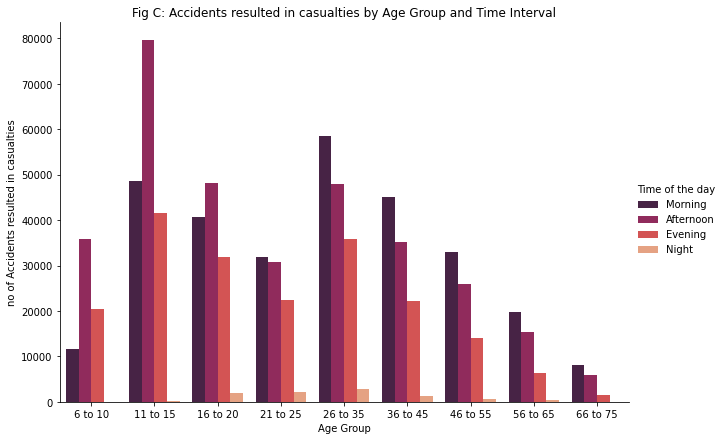

In [ ]:
# fig C
fig3 = sns.catplot(x="Age-group", y="count", hue="Time of the day", data=new6, kind="bar", height=6, aspect=1.5,palette = "rocket") # plot the bar graph
fig3.set_xlabels("Age Group") # set the x axis label
fig3.set_ylabels("no of Accidents resulted in casualties") # set the y axis label
fig3.set(title="Fig C: Accidents resulted in casualties by Age Group and Time Interval") # set the title of the graph
plt.show() # show the graph

#### 
The graph suggest that childern and teenagers usually go for cycling in Afternoon or in the evening, whereas young adults and adults who most of them are professionals, have a pattern of cycling in the morning and in Afternoon, with young adults experience cycling during night hours.\
The no of accidents for childern and teenagers during later part of the day suggest that the casualties are near school areas, libraries and residential blocks, where car or other vehicle drivers dont follow the rules. The accident data for young adults or adults suggest places like city center, parks, gyms, bars, old age home and hospitals.

<font size="+2" color='#3284ad'><b>__4. Accidents Accociated with Gender & Age Group:__</b></font> 

In [ ]:
new7 = df.groupby(["Age_Grp","Gender"]).size() # group by the Accident_Index and the time interval and count the number of rows
new7 = new7.loc[["6 to 10","11 to 15", "16 to 20", "21 to 25", "26 to 35", "36 to 45", "46 to 55", "56 to 65", "66 to 75"],["Male", "Female", "Other"],:].reset_index() # select the rows with the time interval Morning, Night, Afternoon and Evening
new7.columns = ["Age-group","Gender","count"] # rename the columns
new7["percentage"] = new7["count"].div(new7["count"].sum(axis=0)) # calculate the percentage of the total accidents
new7
#new7.sum(axis=0)              # 827861   TRUE
#new7.sum(axis=0)              # 827861   TRUE

,Age-group,Gender,count,percentage
0,6 to 10,Male,56243,0.067938
1,6 to 10,Female,11750,0.014193
2,6 to 10,Other,28,0.000034
3,11 to 15,Male,144101,0.174064
4,11 to 15,Female,25815,0.031183
5,11 to 15,Other,27,0.000033
6,16 to 20,Male,99918,0.120694
7,16 to 20,Female,22662,0.027374
8,16 to 20,Other,22,0.000027
9,21 to 25,Male,64878,0.078368


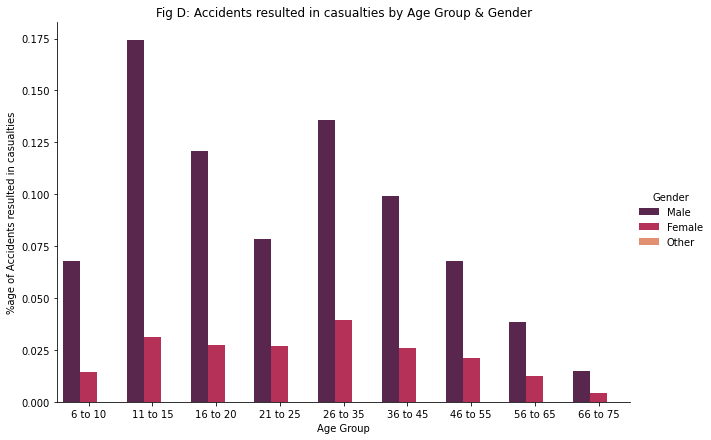

In [ ]:
# fig D
fig4 = sns.catplot(x="Age-group", y = "percentage", hue = "Gender", data = new7, kind = "bar", height = 6, aspect = 1.5,palette = "rocket") # plot the bar graph
fig4.set_xlabels("Age Group") # set the x axis label
fig4.set_ylabels("%age of Accidents resulted in casualties") # set the y axis label
fig4.set(title="Fig D: Accidents resulted in casualties by Age Group & Gender") # set the title of the graph


#### 
As data indicates, the ratio of accidents with male casualties are far higher than that of females.\
For childern and teenagers, this might be True due to their extrovert attitude, and curiosity to explore new experiences and techiniques.\
For young adults and adults, the difference indicates either there are less women on road cycling their way around or they are good cyclist.

<font size="+2" color='#3284ad'><b>__5. Accidents Accociated with Age Group & Severity:__</b></font> 

In [ ]:
new8 = df.groupby(["Age_Grp", "Severity"]).size() # group by the Accident_Index and the time interval and count the number of rows
new8 = new8.loc[["6 to 10","11 to 15", "16 to 20", "21 to 25", "26 to 35", "36 to 45", "46 to 55", "56 to 65", "66 to 75"],["Slight", "Serious", "Fatal"],:].reset_index() # select the rows with the time interval Morning, Night, Afternoon and Evening
new8.columns = ["Age-group","Severity","count"] # rename the columns
new8
#new8.sum(axis=0)              # 827861   TRUE

,Age-group,Severity,count
0,6 to 10,Slight,56110
1,6 to 10,Serious,11522
2,6 to 10,Fatal,389
3,11 to 15,Slight,140538
4,11 to 15,Serious,28242
5,11 to 15,Fatal,1163
6,16 to 20,Slight,103180
7,16 to 20,Serious,18715
8,16 to 20,Fatal,707
9,21 to 25,Slight,74109


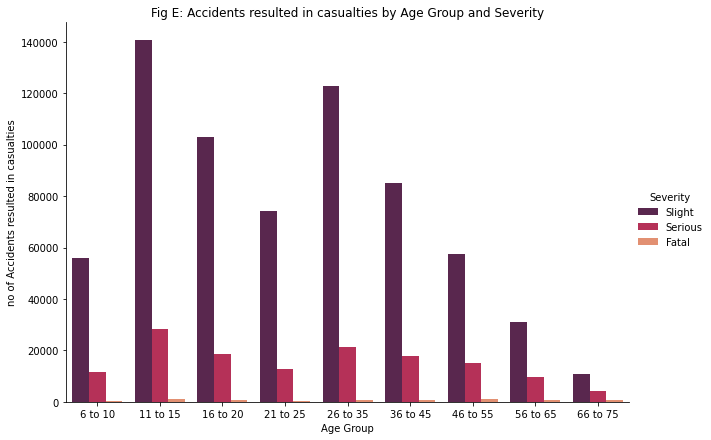

In [ ]:
# fig E
fig5 = sns.catplot(x="Age-group", y="count", hue="Severity", data=new8, kind="bar", height=6, aspect=1.5,palette = "rocket") # plot the bar graph
fig5.set_xlabels("Age Group") # set the x axis label
fig5.set_ylabels("no of Accidents resulted in casualties") # set the y axis label
fig5.set(title="Fig E: Accidents resulted in casualties by Age Group and Severity") # set the title of the graph
plt.show() # show the graph

#### 
The chart indicates the severity of injuries, due to which death happens. Mostly its a slight severity, however, the lackness of protective gear or poor riding habit be the ultimate reason for colossal casualties.\
Besides, Serious and Fatal injuries start making its way for teenagers, young adults and adults. This has a lot of factor influencing the casualties, out of them there might be lackness of physical health, place of accident or mobile phone use during riding.\
There might be a possibility of people owning sub-standard quality bikes, or protective gear which results in a casualty while the severity of accidents are "Slight".

<font size="+2" color='#3284ad'><b>__6. Accidents Accociated with Gender:__</b></font> 

In [ ]:

new9 = df.groupby(["Age_Grp", "Road_type"]).size() # group by the Accident_Index and the time interval and count the number of rows
new9 = new9.loc[["6 to 10","11 to 15", "16 to 20", "21 to 25", "26 to 35", "36 to 45", "46 to 55", "56 to 65", "66 to 75"],
['Single carriageway', 'Dual carriageway','Roundabout','One way sreet' 'Slip road', 'Unknown'],:].reset_index() # select the rows with the time interval Morning, Night, Afternoon and Evening
new9.columns = ["Age-group","Road type","count"] # rename the columns
new9
#df3.Road_type.unique()
#new9.sum(axis=0)              # 827861   TRUE

,Age-group,Road type,count
0,6 to 10,Single carriageway,62659
1,6 to 10,Dual carriageway,1878
2,6 to 10,Roundabout,616
3,6 to 10,Unknown,2787
4,11 to 15,Single carriageway,147502
5,11 to 15,Dual carriageway,8300
6,11 to 15,Roundabout,6753
7,11 to 15,Unknown,6674
8,16 to 20,Single carriageway,96930
9,16 to 20,Dual carriageway,9044


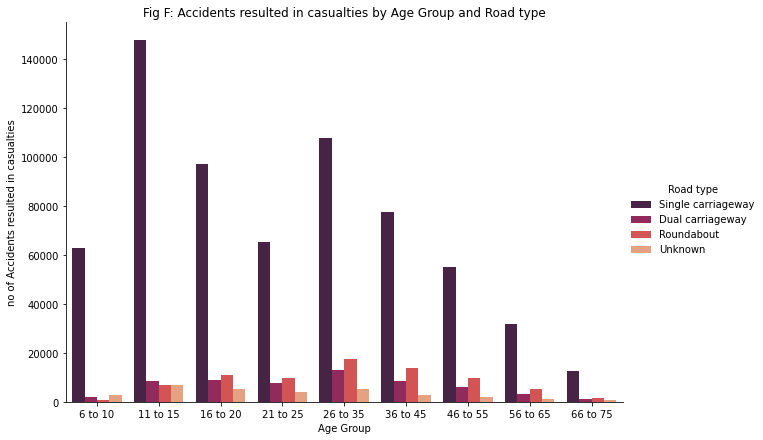

In [ ]:
fig6 = sns.catplot(x="Age-group", y="count", hue="Road type", data=new9, kind="bar", height=6, aspect=1.5,palette = "rocket") # plot the bar graph
fig6.set_xlabels("Age Group") # set the x axis label
fig6.set_ylabels("no of Accidents resulted in casualties") # set the y axis label
fig6.set(title="Fig F: Accidents resulted in casualties by Age Group and Road type") # set the title of the graph
plt.show() # show the graph


The chart shows an enviroment where accident happens.\
For childerns, its only Single Carriageway, however, for teenagers, young adults and adults, their most frequent place is Roundabout after Single carriageway.\
On Single carriageway where traffict flows bothw ways appearently turn out to be a major reason for casualties.


<font size="+3" color='#3284ad'><b>__STEP-7__</b></font>`

### __The Data to Yearly Data:__

In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
new = df.groupby('Date').size()
new = new.reset_index() # select the rows with the time interval Morning, Night, Afternoon and Evening
new.columns = ["Date","count"] # rename the columns
new

,Date,count
0,1979-01-01,8
1,1979-01-02,51
2,1979-01-03,62
3,1979-01-04,31
4,1979-01-05,62
...,...,...
14604,2018-12-27,13
14605,2018-12-28,29
14606,2018-12-29,21
14607,2018-12-30,19


Text(0.5, 1.0, 'Accidents by Date')

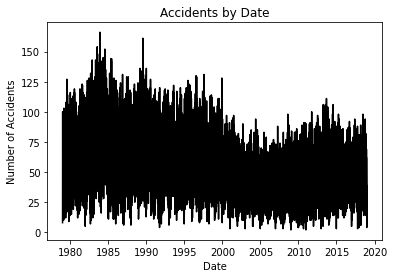

In [ ]:


x = new["Date"] # x axis values
y = new["count"] # y axis values
plt.plot(x,y, color='black') # plot the line chart 
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Date')

The graph demonstrated that the year from 1980 till 2000 shows fluctuation in a rising manner as compared to 2000 onwards which is decreasing.

<font size="+3" color='#3284ad'><b>__STEP-8__</b></font>`

<font size="+3" color='#3284ad'><b>__CORRELATION__</b></font>`

### _Let's find correlation between the variables using pearson correlation_

In [ ]:
corr=df.corr(method='spearman')
corr

,Number_of_Vehicles,Number_of_Casualties
Number_of_Vehicles,1.000000,0.065676
Number_of_Casualties,0.065676,1.000000


<AxesSubplot:>

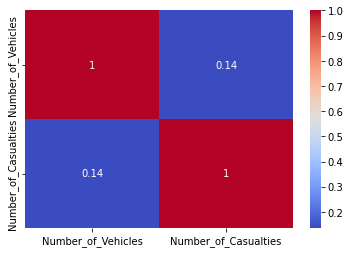

In [ ]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [ ]:
#import scipy.stats as stats
#f_obs = df["Number_of_Vehicles"]
#f_exp = df["Number_of_Casualties"]

#stats.chisquare(f_obs, f_exp, axis = 0)

#import chi2 from scipy to get critical value
#from scipy.stats import chi2
#@alpha = 0.05
#df = 2
#cr=chi2.ppf(q=1-alpha,df=df)

from scipy.stats import chi2_contingency
contigency= pd.crosstab(df['Number_of_Vehicles'], df['Number_of_Casualties']) 
contigency

#c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
#print(p)




Number_of_Casualties,1,2,3,4,5,6,7,8,9,10,12,13,34,60
Number_of_Vehicles,,,,,,,,,,,,,,
1,37317,4376,85,7,1,0,0,0,0,0,0,0,0,0
2,735112,22305,1203,113,36,8,3,1,1,0,0,2,0,0
3,19063,5085,636,107,33,18,5,2,3,0,0,1,1,1
4,1037,479,236,73,19,6,7,1,1,1,1,0,0,0
5,121,93,52,47,19,6,2,3,0,0,0,0,0,0
6,22,20,8,3,9,10,0,0,0,0,0,0,0,0
7,9,5,5,3,4,2,2,0,0,0,0,0,0,0
8,3,4,2,1,2,4,3,1,0,0,0,1,0,0
9,1,0,0,2,0,0,1,0,0,0,0,0,0,0


<font size="+3" color='#3284ad'><b>__STEP-10__</b></font>`

<font size="+3" color='#3284ad'><b>__CONCLUSION__</b></font>`

The Dataset comprised of mostly categorical data, of which 79.7% male and 20.2% female.\
The casualties in this record are from 1979-2018, with variables like speed limit, Time, Road and weather conditions, etc, gives a comprehensive overview and allow us to extract fruitful insights.\
With Time variable, we created a feature comprised of day segment and this opens up a new horizons in analysis and insights. For example; we were able to understand how childern and teenage like to cycle in Afternoon and evening, while their young adult fellows and adult fellows likes to cycle during morning and Afternoon. We were able to gather this insight b/c the casualty rate was much higher during Morning, Afternoon and Evening, during weekdays, and much lower during weekends. This allows us to infer, if there are such huge number of casualty, then the number of users are huge in that time period. Also we infer, the casualty rate is lower on weekends dur to lower traffic on roads.\
Upon close observation, it is revealed that the data is gender biased, which might be either women dont really like to cycle or they were left behind intentionally, or they are really good at cycling, due to lower number of casualty.\
Beside, whatever the scenario, most casualty are due to cycle on single carriageway. This is the most common form of road standard in the United Kingdom and Ireland. Most casualty happens in the clearest of days and during daylight, which begs a question, is it safe to cycle in Great Britan?

It is suggested that the government should incorporate path for cyclers to travel safe and introduce strict laws for vehicle drivers who hackel and misbehave with cyclists.

## Report submitted by:
### Naveed Ul Mustafa
### Saleha Attiq
### Ali Hamza

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8507b333-aaeb-4ead-bf95-a72a2bcf3758' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>